# 5. Explore the Data

> "I don't know, what I don't know"

We want to first **visually explore** the data to see if we can confirm some of our initial hypotheses as well as make new hypothesis about the problem we are trying to solve.

- Why do visual exploration?
- Understand Data Structure & Types
- Grammar of Graphics and Basics of visualisation
- Explore single variable graphs - (Quantitative, Categorical)
- Explore dual variable graphs - (Q & Q, Q & C, C & C)
- Explore multi-dimensional variable graphs

For this we will start by loading the data and understanding the data structure of the dataframe we have.

## Lets read the data

In [5]:
# Import the library we need, which is Pandas
import pandas as pd

You will find the variable `df` used quite often to store a `dataframe`

In [6]:
# Read the csv file of Monthwise Quantity and Price csv file we have.
df = pd.read_csv('MonthWiseMarketArrivals_clean.csv')

In [7]:
# Changing the date column to a Time Interval columnn
df.date = pd.DatetimeIndex(df.date)

### PRINCIPLE: Visual Exploration 
Lets load the libraries required for plotting in python

In [8]:
# Load the visualisation libraries - Matplotlib
import matplotlib.pyplot as plt

In [9]:
# Let us see the output plots in the notebook itself
%matplotlib inline

In [10]:
# Set some parameters to get good visuals - style to ggplot and size to 15,10
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)

### Plot the Quantity by City in 2016

In [11]:
df2016 = df[df.year == 2016]

In [12]:
df2016City = df2016.groupby(['city'], as_index=False).quantity.sum()

In [13]:
df2016City = df2016City.sort_values(by="quantity")

In [14]:
df2016City.tail(10)

,city,quantity
72,INDORE,2254330
109,MUMBAI,2872669
117,NEWASA,2897566
42,DELHI,3066639
97,LASALGAON,3402394
129,PUNE,3493535
154,SOLAPUR,3767140
126,PIMPALGAON,3836046
102,MAHUVA,6144573
15,BANGALORE,9117473


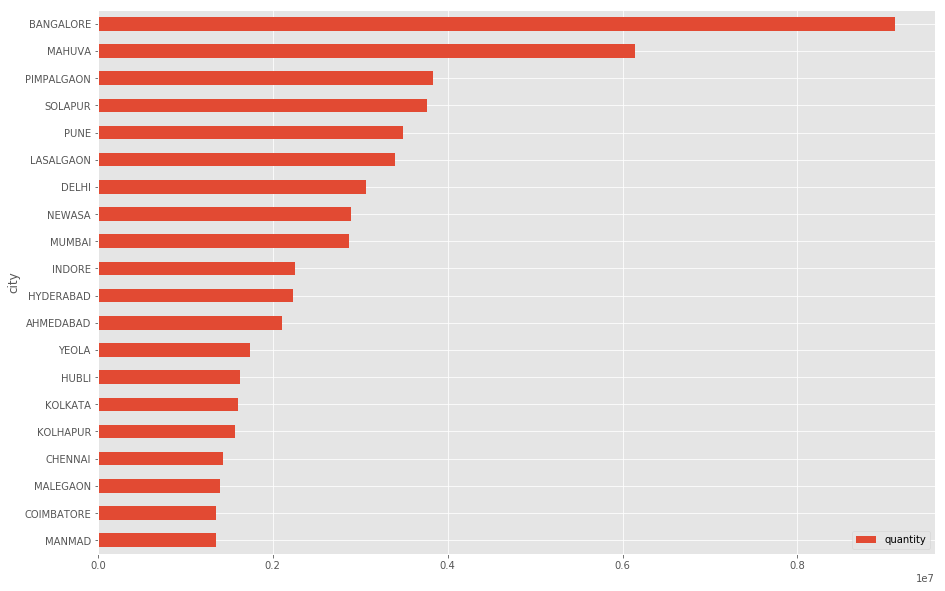

In [15]:
# Plot the Data
df2016City.tail(20).plot(kind ="barh", x = 'city', y = 'quantity')

### Exercise

Plot the quantity of Onion sold in each State for  2015

## Question 2 - Have the price variation in Onion prices in Bangalore really gone up over the years?

In [16]:
dfBang = df[df.city == 'BANGALORE']

In [17]:
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
847,BANGALORE,January,2004,227832,916,1066,991,KT,BANGALORE,2004-01-01
848,BANGALORE,January,2005,335679,470,597,522,KT,BANGALORE,2005-01-01
849,BANGALORE,January,2006,412185,286,617,537,KT,BANGALORE,2006-01-01
850,BANGALORE,January,2007,268268,586,1167,942,KT,BANGALORE,2007-01-01
851,BANGALORE,January,2008,393806,174,671,472,KT,BANGALORE,2008-01-01


In [18]:
dfBang.describe()

,year,quantity,priceMin,priceMax,priceMod
count,157.000000,1.570000e+02,157.000000,157.000000,157.000000
mean,2010.044586,5.418205e+05,532.471338,1304.585987,1027.980892
std,3.783134,3.285137e+05,378.973471,879.504946,646.272522
min,2004.000000,6.382400e+04,145.000000,338.000000,320.000000
25%,2007.000000,3.357280e+05,286.000000,700.000000,559.000000
50%,2010.000000,4.187940e+05,426.000000,1075.000000,828.000000
75%,2013.000000,6.620160e+05,622.000000,1518.000000,1267.000000
max,2017.000000,1.974018e+06,2377.000000,4698.000000,3430.000000


In [19]:
# Reduce the precision of numbers - so that it is easy to read
pd.set_option('precision', 0)

In [20]:
dfBang.describe()

,year,quantity,priceMin,priceMax,priceMod
count,157,2e+02,157,157,157
mean,2010,5e+05,532,1305,1028
std,4,3e+05,379,880,646
min,2004,6e+04,145,338,320
25%,2007,3e+05,286,700,559
50%,2010,4e+05,426,1075,828
75%,2013,7e+05,622,1518,1267
max,2017,2e+06,2377,4698,3430


### PRINCIPLE: Setting Index

In [21]:
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
847,BANGALORE,January,2004,227832,916,1066,991,KT,BANGALORE,2004-01-01
848,BANGALORE,January,2005,335679,470,597,522,KT,BANGALORE,2005-01-01
849,BANGALORE,January,2006,412185,286,617,537,KT,BANGALORE,2006-01-01
850,BANGALORE,January,2007,268268,586,1167,942,KT,BANGALORE,2007-01-01
851,BANGALORE,January,2008,393806,174,671,472,KT,BANGALORE,2008-01-01


In [22]:
dfBang.index

Int64Index([ 847,  848,  849,  850,  851,  852,  853,  854,  855,  856,
            ...
             994,  995,  996,  997,  998,  999, 1000, 1001, 1002, 1003],
           dtype='int64', length=157)

In [23]:
# Set the index as date
dfBang = dfBang.sort_values(by = "date")
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
847,BANGALORE,January,2004,227832,916,1066,991,KT,BANGALORE,2004-01-01
861,BANGALORE,February,2004,225133,741,870,793,KT,BANGALORE,2004-02-01
874,BANGALORE,March,2004,221952,527,586,556,KT,BANGALORE,2004-03-01
887,BANGALORE,April,2004,185150,419,518,465,KT,BANGALORE,2004-04-01
900,BANGALORE,May,2004,137390,400,516,455,KT,BANGALORE,2004-05-01


In [24]:
# Set the Index for the Dataframe
dfBang.index = pd.PeriodIndex(dfBang.date, freq='M')

In [25]:
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
2004-01,BANGALORE,January,2004,227832,916,1066,991,KT,BANGALORE,2004-01-01
2004-02,BANGALORE,February,2004,225133,741,870,793,KT,BANGALORE,2004-02-01
2004-03,BANGALORE,March,2004,221952,527,586,556,KT,BANGALORE,2004-03-01
2004-04,BANGALORE,April,2004,185150,419,518,465,KT,BANGALORE,2004-04-01
2004-05,BANGALORE,May,2004,137390,400,516,455,KT,BANGALORE,2004-05-01


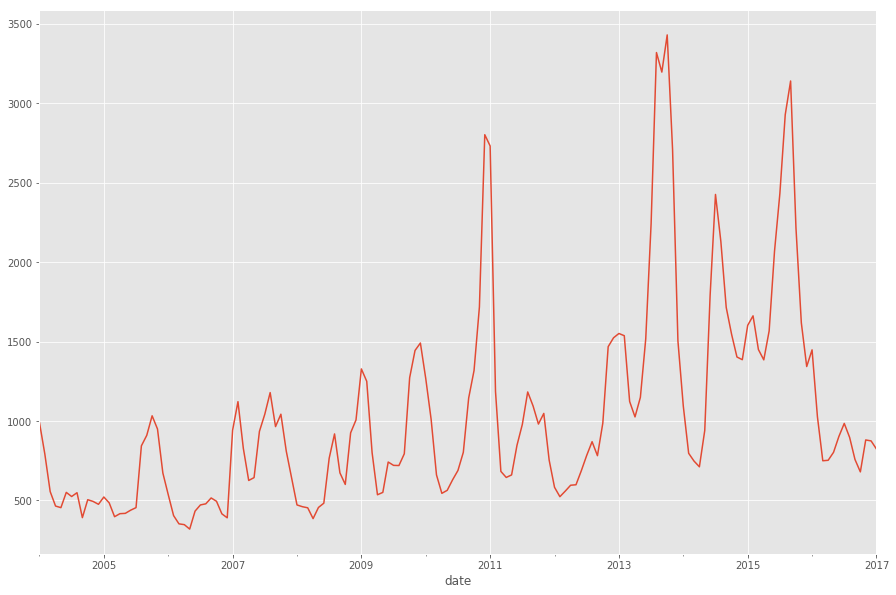

In [26]:
dfBang.priceMod.plot()

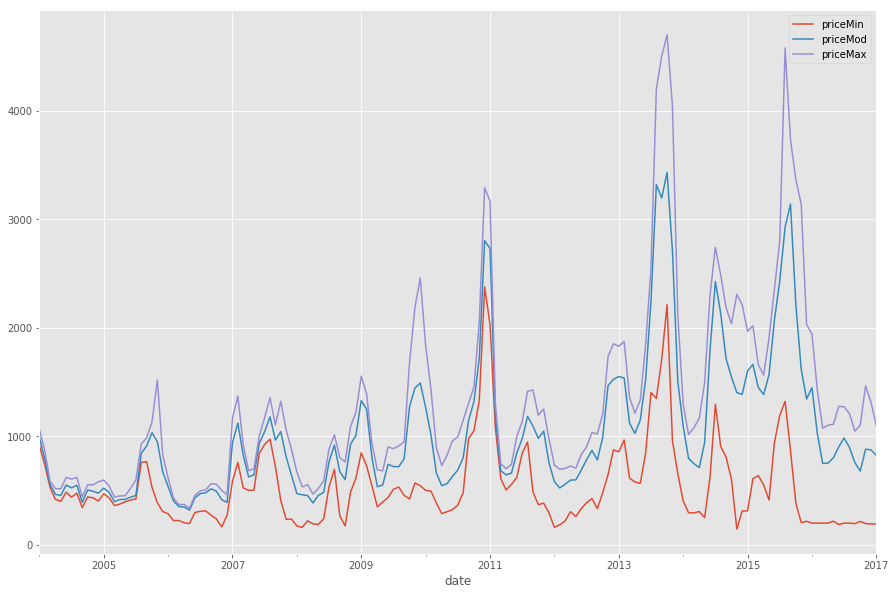

In [27]:
dfBang.plot(kind = "line", y = ['priceMin', 'priceMod', 'priceMax'])

To calculate the range of change, we will create a new price difference variable - which is the difference between the priceMin and priceMax

In [28]:
dfBang['priceDiff'] = dfBang['priceMax'] - dfBang['priceMin']

In [29]:
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date,priceDiff
date,,,,,,,,,,,
2004-01,BANGALORE,January,2004,227832,916,1066,991,KT,BANGALORE,2004-01-01,150
2004-02,BANGALORE,February,2004,225133,741,870,793,KT,BANGALORE,2004-02-01,129
2004-03,BANGALORE,March,2004,221952,527,586,556,KT,BANGALORE,2004-03-01,59
2004-04,BANGALORE,April,2004,185150,419,518,465,KT,BANGALORE,2004-04-01,99
2004-05,BANGALORE,May,2004,137390,400,516,455,KT,BANGALORE,2004-05-01,116


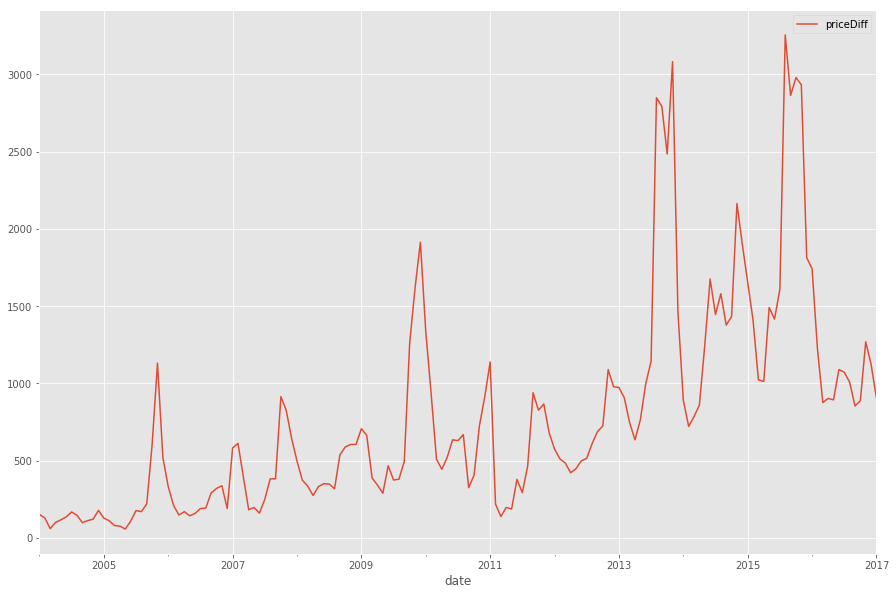

In [30]:
dfBang.plot(kind = 'line', y = 'priceDiff')

### PRINCIPLE: Pivot Table

Pivot table is a way to summarize data frame data into index (rows), columns and value 

![](../img/pivot.png)

In [31]:
# Create new variable for Integer Month
dfBang['monthVal'] = pd.DatetimeIndex(dfBang['date']).month

In [32]:
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date,priceDiff,monthVal
date,,,,,,,,,,,,
2004-01,BANGALORE,January,2004,227832,916,1066,991,KT,BANGALORE,2004-01-01,150,1
2004-02,BANGALORE,February,2004,225133,741,870,793,KT,BANGALORE,2004-02-01,129,2
2004-03,BANGALORE,March,2004,221952,527,586,556,KT,BANGALORE,2004-03-01,59,3
2004-04,BANGALORE,April,2004,185150,419,518,465,KT,BANGALORE,2004-04-01,99,4
2004-05,BANGALORE,May,2004,137390,400,516,455,KT,BANGALORE,2004-05-01,116,5


In [33]:
dfBangPivot = pd.pivot_table(dfBang, values = "priceDiff", 
                             columns = "year", index = "monthVal")

In [34]:
dfBangPivot

year,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
monthVal,,,,,,,,,,,,,,
1,150,127,331,581,497,706,1335,1138,575,973,892,1654,1743,904
2,129,110,209,611,373,663,934,218,511,907,721,1409,1226,NaN
3,59,79,147,398,334,387,509,137,484,745,784,1022,875,NaN
4,99,75,169,181,274,341,443,196,421,634,859,1012,902,NaN
5,116,56,142,196,331,288,521,186,447,764,1245,1491,893,NaN
6,135,107,157,159,350,466,634,378,498,997,1675,1416,1089,NaN
7,167,176,189,248,348,374,629,292,514,1143,1446,1608,1072,NaN
8,145,169,192,381,317,379,668,465,609,2849,1580,3256,1008,NaN
9,98,219,290,382,537,495,324,939,687,2793,1377,2864,853,NaN


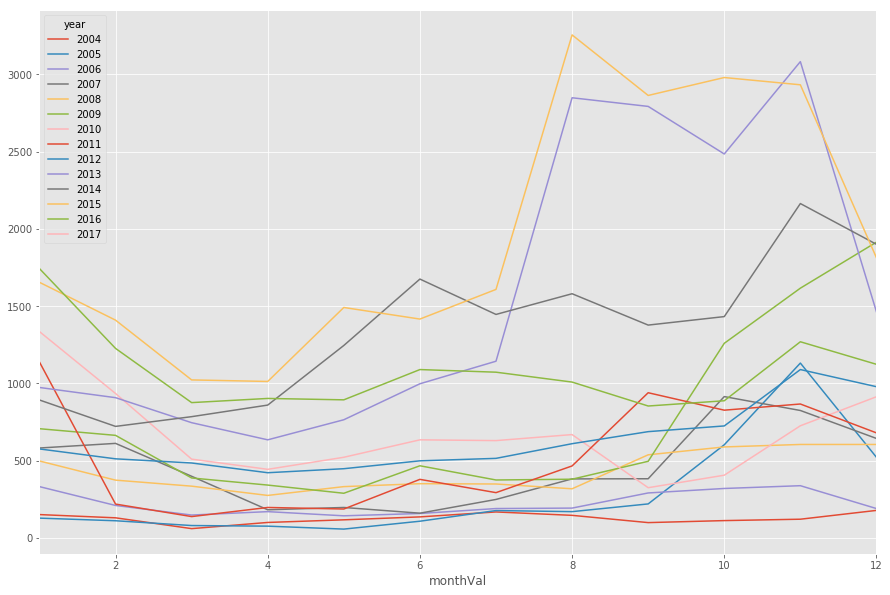

In [35]:
dfBangPivot.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112cac780>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x113a684e0>]], dtype=object)

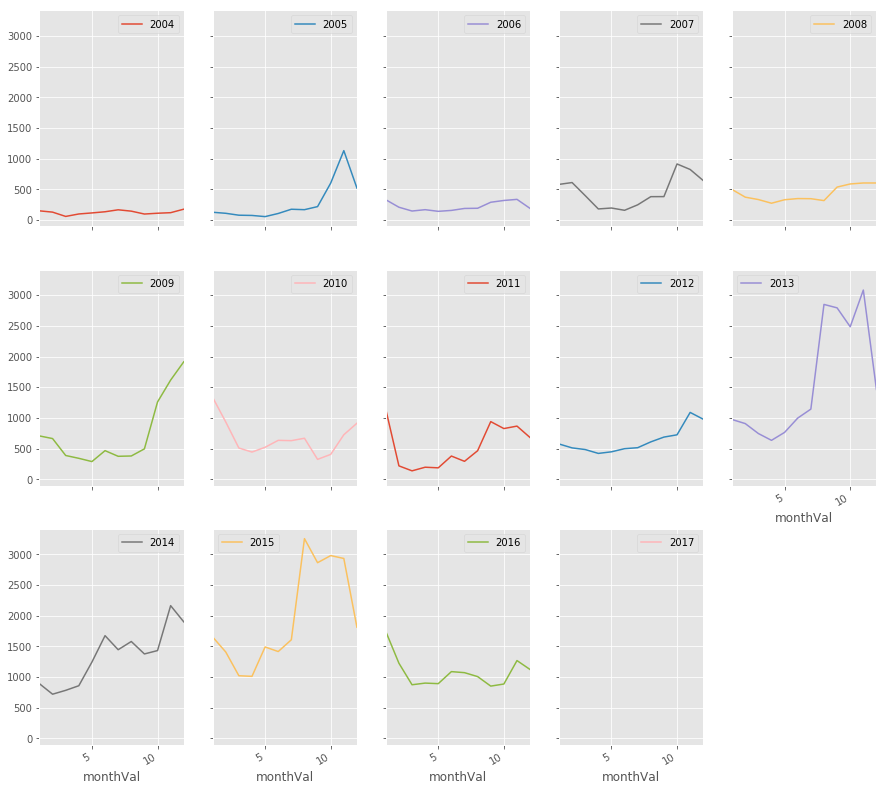

In [36]:
dfBangPivot.plot(subplots = True, figsize=(15, 15), layout=(3, 5), sharey=True)

### Exercise

Plot the price difference (priceMax - priceMin) for Delhi? 

## Question 3: Which market has more price variation - Bangalore or Delhi?

In [37]:
# Import statsmodel
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind

In [50]:
df['priceDiff'] = df['priceMax'] - df['priceMin']

In [51]:
# Set the Index for the Dataframe
df.index = pd.PeriodIndex(df.date, freq='M')

In [57]:
# Sort the data frame by date
df = df.sort_values(by = "date")

In [58]:
dfBng = df.loc[df.city == "BANGALORE"]
dfBngDiff = dfBng.priceDiff

In [59]:
dfDel = df.loc[df.city == "DELHI"]
dfDelDiff = dfDel.priceDiff

Let us look at the mean of price difference from Bangalore and Delhi?

In [60]:
dfDelDiff.mean(), dfBngDiff.mean()

(693.15976331360946, 772.1146496815287)

In [61]:
dfDelDiff.mean()- dfBngDiff.mean()

-78.954886367919244

The actual question is whether this difference of INR 78 is significant?

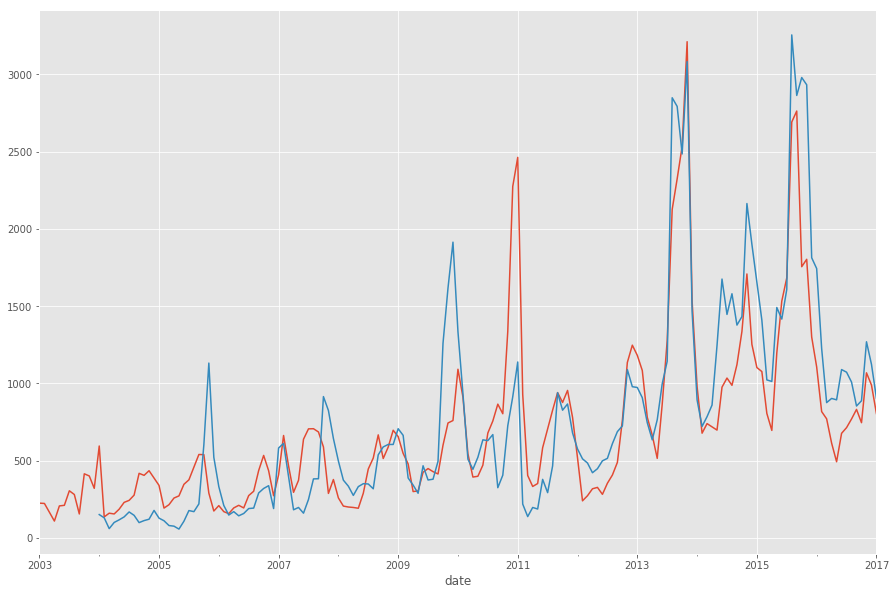

In [62]:
dfDelDiff.plot()
dfBngDiff.plot()

The actual question is whether this difference of INR 78 is significant

https://en.wikipedia.org/wiki/Welch%27s_t-test

In [64]:
?ttest_ind

In [65]:
ttest_ind(dfBngDiff, dfDelDiff, alternative='larger', usevar='unequal')

(1.1387073084529027, 0.12786491183875404, 301.29753435606023)